In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files


uploaded = files.upload()

Saving uber.csv to uber.csv


In [115]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['uber.csv']))

In [116]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [118]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [119]:
df.dropna(inplace=True)

In [120]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

In [121]:
df['distance'] = np.sqrt((df['dropoff_latitude'] - df['pickup_latitude'])**2 + (df['dropoff_longitude'] - df['pickup_longitude'])**2)

In [122]:
df.drop(columns=['Unnamed: 0', 'key', 'pickup_datetime', 'dropoff_latitude', 'pickup_latitude', 'dropoff_longitude', 'pickup_longitude'], inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      199999 non-null  float64
 1   passenger_count  199999 non-null  int64  
 2   day_of_week      199999 non-null  int32  
 3   distance         199999 non-null  float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 6.9 MB


In [124]:
df.skew()

,0
fare_amount,4.504900
passenger_count,18.145667
day_of_week,-0.039968
distance,172.404414


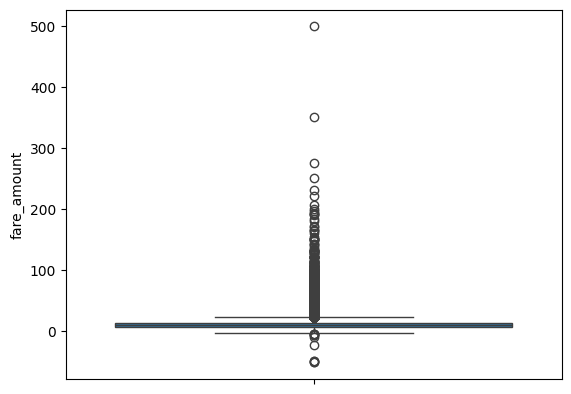

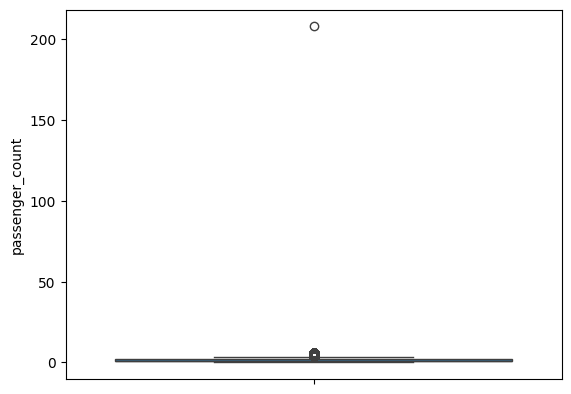

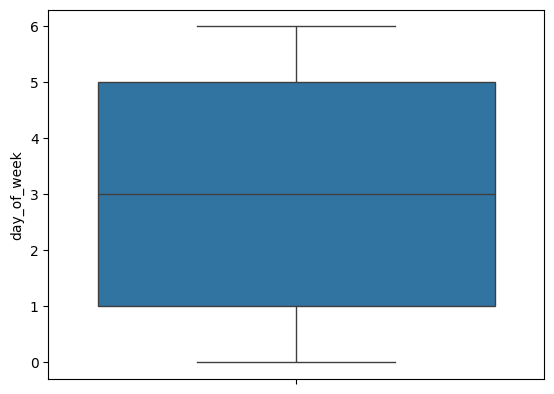

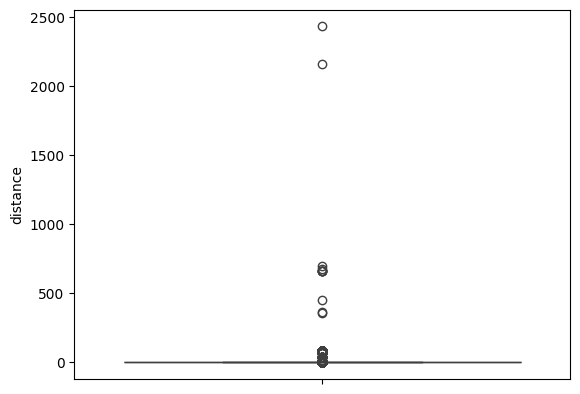

In [125]:
for i, column in enumerate(df.columns):
    sns.boxplot(y=df[column])
    plt.show()
    print()

In [126]:
def remove_outliers(df, column, trim=True):
  print('Boxplot before Outlier Handling')
  sns.boxplot(df[column])
  plt.show()

  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  upper_limit = Q3 + 1.5 * IQR
  lower_limit = Q1 - 1.5 * IQR

  outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
  print(f"Number of outliers in {column}: {len(outliers)}")

  if trim:
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
  else:
    df[column] = np.where(df[column] < lower_limit, lower_limit, np.where(df[column] > upper_limit, upper_limit, df[column]))

  print('Boxplot after Outlier Handling')
  sns.boxplot(df[column])
  return df

Boxplot before Outlier Handling


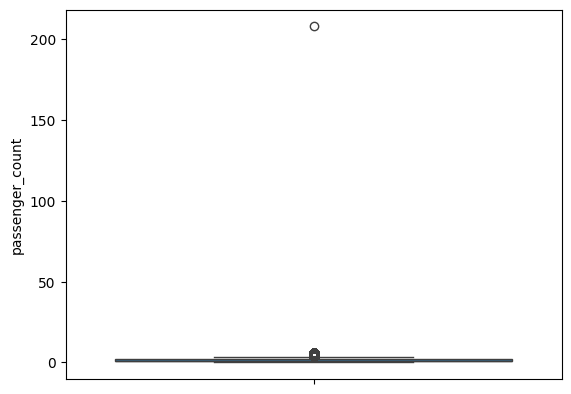

Number of outliers in passenger_count: 22557
Boxplot after Outlier Handling


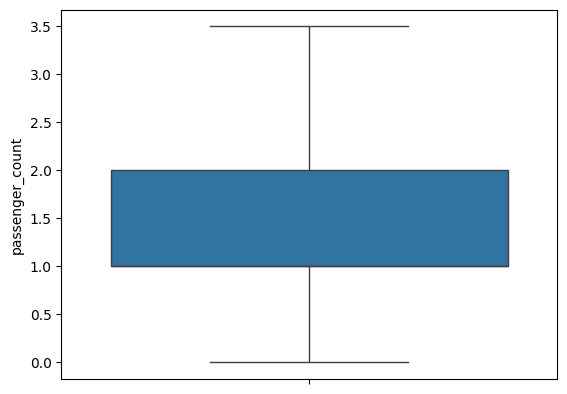

In [127]:
df_cap=remove_outliers(df, 'passenger_count', trim=False)

Boxplot before Outlier Handling


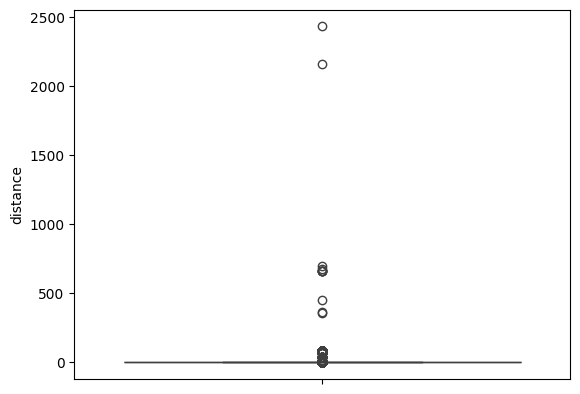

Number of outliers in distance: 17344
Boxplot after Outlier Handling


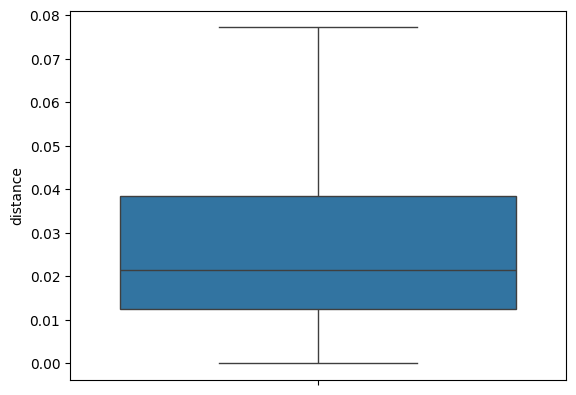

In [128]:
df_cap=remove_outliers(df, 'distance', trim=False)

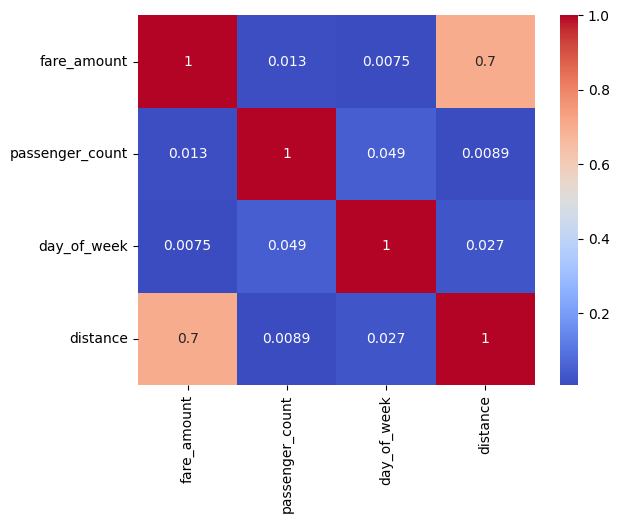

In [129]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [137]:
X = df.iloc[:, [1, 3]]
y = df.iloc[:, 0]

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [140]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [141]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 56.995491711535934
R-squared: 0.45209251888930757


In [142]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [143]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 50.69312630396219
R-squared: 0.5126782433353689
